This EDA explores which Blue Jays hitters contributed the most value in 2025 using WAR and rate stats (OPS, OPS+), and identifies under/over-performers relative to playing time (PA)

In [1]:
import pandas as pd

df = pd.read_csv('/content/bluejays_batting_2024_clean.csv')
df.head()

,Rk,Player,Age,Pos,WAR,G,PA,AB,R,H,...,rOBA,Rbat+,TB,GIDP,HBP,SH,SF,IBB,Awards,Player-additional
0,1,Alejandro Kirk,25,C,2.0,103,386,340,23,86,...,0.303,94.0,122,11,2,0,9,1,NaN,kirkal01
1,2,Vladimir Guerrero Jr.,25,1B,6.2,159,697,616,98,199,...,0.399,165.0,335,16,5,0,4,12,ASMVP-6SS,guerrvl02
2,3,Spencer Horwitz,26,2B,1.2,97,381,328,46,87,...,0.346,125.0,142,8,7,0,4,2,NaN,horwisp01
3,4,Bo Bichette,26,SS,-0.3,81,336,311,29,70,...,0.269,68.0,100,12,3,0,2,1,NaN,bichebo01
4,5,Ernie Clement,28,3B,3.4,139,452,434,48,114,...,0.317,102.0,177,11,3,2,2,1,NaN,clemeer01


In [2]:
df.shape
df.columns
df.describe(include='all')

,Rk,Player,Age,Pos,WAR,G,PA,AB,R,H,...,rOBA,Rbat+,TB,GIDP,HBP,SH,SF,IBB,Awards,Player-additional
count,27.000000,27,27.000000,27,27.000000,27.000000,27.000000,27.000000,27.000000,27.000000,...,25.000000,25.000000,27.000000,27.000000,27.000000,27.000000,27.000000,27.000000,2,27
unique,NaN,27,NaN,14,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2,27
top,NaN,Alejandro Kirk,NaN,C,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,ASMVP-6SS,kirkal01
freq,NaN,1,NaN,4,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,1
mean,14.000000,NaN,27.777778,NaN,1.033333,62.703704,224.444444,200.370370,24.851852,48.370370,...,0.301720,92.680000,78.000000,4.666667,2.888889,0.518519,1.666667,0.666667,NaN,NaN
std,7.937254,NaN,4.098155,NaN,1.617453,49.945212,200.616614,179.223142,25.572978,48.051373,...,0.053294,40.558312,80.393264,5.442002,3.544588,1.188741,2.130367,2.320477,NaN,NaN
min,1.000000,NaN,22.000000,NaN,-0.400000,1.000000,0.000000,0.000000,0.000000,0.000000,...,0.208000,26.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN,NaN
25%,7.500000,NaN,25.000000,NaN,0.050000,23.000000,58.000000,50.000000,5.500000,8.500000,...,0.269000,68.000000,12.500000,0.500000,0.000000,0.000000,0.000000,0.000000,NaN,NaN
50%,14.000000,NaN,27.000000,NaN,0.400000,62.000000,210.000000,179.000000,18.000000,39.000000,...,0.300000,92.000000,62.000000,2.000000,2.000000,0.000000,1.000000,0.000000,NaN,NaN
75%,20.500000,NaN,29.000000,NaN,1.150000,94.000000,365.000000,319.500000,34.500000,76.500000,...,0.321000,109.000000,117.000000,8.500000,5.000000,0.000000,3.000000,0.000000,NaN,NaN


In [3]:
df[['Player','WAR','PA','OPS','OPS+']].sort_values('WAR', ascending=False).head(10)

,Player,WAR,PA,OPS,OPS+
1,Vladimir Guerrero Jr.,6.2,697,0.940,164.0
6,Daulton Varsho,5.0,513,0.700,96.0
4,Ernie Clement,3.4,452,0.692,94.0
9,Isiah Kiner-Falefa,3.2,281,0.758,114.0
0,Alejandro Kirk,2.0,386,0.677,92.0
2,Spencer Horwitz,1.2,381,0.790,123.0
16,Nathan Lukes,1.2,91,0.818,131.0
7,George Springer,1.1,614,0.674,91.0
12,Kevin Kiermaier,0.9,217,0.546,54.0
13,Leo Jiménez,0.9,210,0.686,95.0


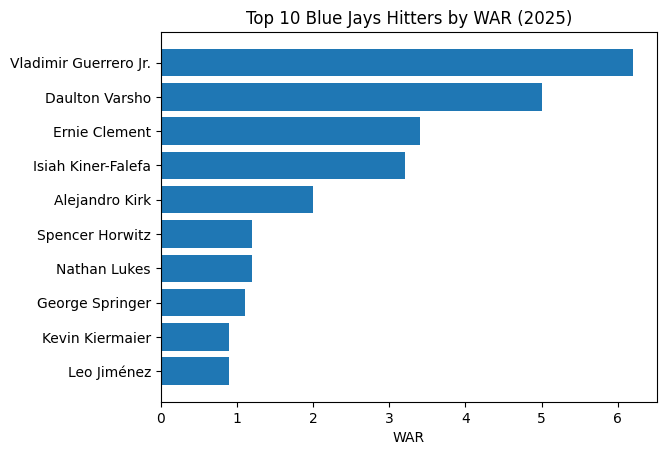

In [4]:
import matplotlib.pyplot as plt

top_war = df.sort_values('WAR', ascending=False).head(10)
plt.figure()
plt.barh(top_war['Player'], top_war['WAR'])
plt.gca().invert_yaxis()
plt.title('Top 10 Blue Jays Hitters by WAR (2025)')
plt.xlabel('WAR')
plt.show()

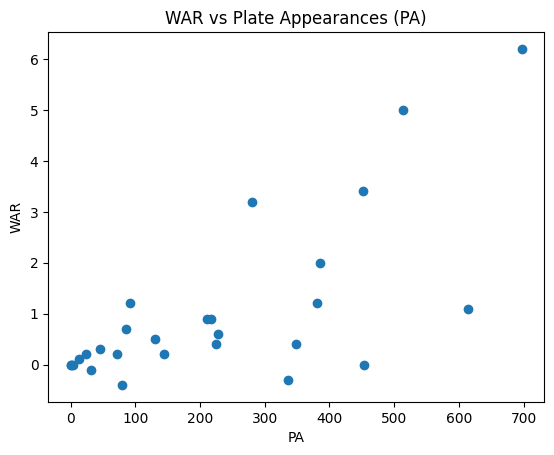

In [5]:
plt.figure()
plt.scatter(df['PA'], df['WAR'])
plt.title('WAR vs Plate Appearances (PA)')
plt.xlabel('PA')
plt.ylabel('WAR')
plt.show()

In [6]:
df[['Player','OPS+','PA','WAR','OBP','SLG']].sort_values('OPS+', ascending=False).head(10)

,Player,OPS+,PA,WAR,OBP,SLG
22,Jonatan Clase,178.0,23,0.2,0.435,0.550
1,Vladimir Guerrero Jr.,164.0,697,6.2,0.396,0.544
16,Nathan Lukes,131.0,91,1.2,0.371,0.447
2,Spencer Horwitz,123.0,381,1.2,0.357,0.433
17,Will Wagner,122.0,86,0.7,0.337,0.451
9,Isiah Kiner-Falefa,114.0,281,3.2,0.338,0.420
8,Justin Turner,106.0,349,0.4,0.350,0.372
6,Daulton Varsho,96.0,513,5.0,0.293,0.407
13,Leo Jiménez,95.0,210,0.9,0.329,0.358
4,Ernie Clement,94.0,452,3.4,0.284,0.408


In [7]:
top5_share = df.sort_values('WAR', ascending=False).head(5)['WAR'].sum() / df['WAR'].sum()
top5_share

np.float64(0.7096774193548387)

Value concentration: The top 5 hitters account for ~71% of total hitter WAR, indicating team value is highly concentrated in a small core rather than distributed across the lineup

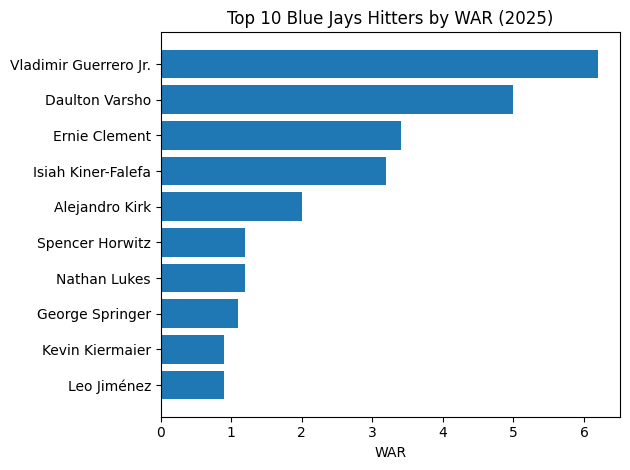

In [8]:
plt.figure()
plt.barh(top_war['Player'], top_war['WAR'])
plt.gca().invert_yaxis()
plt.title('Top 10 Blue Jays Hitters by WAR (2025)')
plt.xlabel('WAR')
plt.tight_layout()
plt.savefig('top10_war_hitters_2025.png', dpi=200)
plt.show()